# Example notebook 

This notebook is a copy from `examples/getting_started/0_Getting_started/0_Getting_started.ipynb` with a small modifications for use with [Papermill](https://github.com/nteract/papermill).


## Papermill parameters

Papermill is a tool for parameterizing, executing, and analyzing Jupyter Notebooks. 
To parameterize a notebook, we need tag a cell that contains all the parameters. 
We can only tag one cell, and for simplicity we place it at the top of the notebook. 
Full instructions are available here https://papermill.readthedocs.io/en/latest/usage-parameterize.html#designate-parameters-for-a-cell. 

Below, we tag the parameter `shots=1000`. 
We can then run the notebook as usual cell-by-cell to see the results. 

We additionally add two Braket specific parameters called device_arn and results_dir. 
These will be overriden when we run a Braket Job. 

**In the following cell, we add a tag called `parameters` for Papermill to recognize.**

In [1]:
# Papermill parameters
shots = 1000

# Braket specific parameters
device_arn = "arn:aws:braket:::device/quantum-simulator/amazon/sv1"
results_dir = "."

# Getting started with Amazon Braket

In this hello-world tutorial we prepare a maximally entangled Bell state between two qubits. We then run our circuit on a local simulator and obtain the results.

In [2]:
# general imports
import matplotlib.pyplot as plt

%matplotlib inline

from braket.aws import AwsDevice

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.devices import LocalSimulator

## Build a circuit

Let's build a Bell state with two qubits. By calling `Circuit()` we create an empty circuit, and we can just add gates to the circuit. 

In [3]:
# build a Bell state with two qubits. Here 'cnot(control=0, target=1)' can be simplified as 'cnot(0,1)'
bell = Circuit().h(0).cnot(control=0, target=1)

## Submit the circuit to the local simulator and obtain the results

Here we submit our circuit to the local simulator and obtain the results.

In [4]:
# set up device
device = AwsDevice(device_arn)
# device = LocalSimulator()

# run circuit
result = device.run(bell, shots=shots).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'11': 502, '00': 498})


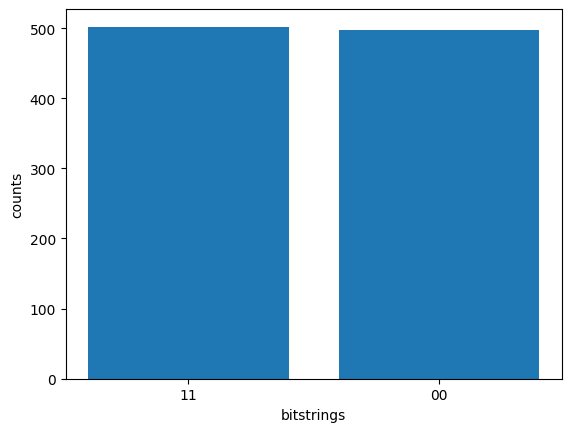

In [5]:
# plot using Counter
plt.bar(counts.keys(), counts.values())
plt.xlabel("bitstrings")
plt.ylabel("counts");

**The following cell saves the notebook figures to a file**

The use of `results_dir` is that the figures saves to the correct directory when called from a Braket Job.

In [6]:
plt.savefig(f"{results_dir}/histogram.png")

<Figure size 640x480 with 0 Axes>

In [7]:
from braket.jobs.metrics import log_metric

log_metric(
    metric_name="loss",
    value=1,
    iteration_number=1,
)

Metrics - timestamp=1667573122.726625; loss=1; iteration_number=1;
